In [130]:
import pandas as pd
import numpy as np

In [131]:
#to plot within notebook
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [132]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
pd.set_option('display.max_columns', 100) 
activeCase = pd.read_csv('sorted_data.csv' )
activeCase.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020


In [135]:
activeCase.tail()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
998,01-05-2023,Tamil Nadu,06-01-2023 04:21,11.006091,78.400624,3594487,38049,"Tamil Nadu, India",4617.713892,1.0585377,NaN,NaN,2023
999,01-04-2023,Tamil Nadu,05-01-2023 04:21,11.006091,78.400624,3594478,38049,"Tamil Nadu, India",4617.702330,1.05854035,NaN,NaN,2023
1000,01-03-2023,Tamil Nadu,04-01-2023 04:21,11.006091,78.400624,3594466,38049,"Tamil Nadu, India",4617.686914,1.058543884,NaN,NaN,2023
1001,01-02-2023,Tamil Nadu,03-01-2023 04:21,11.006091,78.400624,3594456,38049,"Tamil Nadu, India",4617.674067,1.058546829,NaN,NaN,2023
1002,01-01-2023,Tamil Nadu,02-01-2023 04:20,11.006091,78.400624,3594444,38049,"Tamil Nadu, India",4617.658651,1.058550363,NaN,NaN,2023


In [136]:
#activeCase['FIPS'].dtypes

In [137]:
activeCase.set_index('FIPS',inplace=True)


In [138]:
activeCase.head()


,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
FIPS,,,,,,,,,,,,
12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020
12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020
12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020


In [139]:
activeCase = activeCase.drop(['Province_State','Last_Update','Lat','Long_','Combined_Key'],axis=1)



In [140]:
activeCase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 12-31-2020 to 01-01-2023
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confirmed            1003 non-null   int64  
 1   Deaths               1003 non-null   int64  
 2   Recovered            1003 non-null   object 
 3   Active               1003 non-null   float64
 4   Incident_Rate        421 non-null    float64
 5   Case_Fatality_Ratio  421 non-null    float64
 6   Year                 1003 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 62.7+ KB


In [141]:
activeCase['Recovered'] = activeCase['Recovered'].apply(pd.to_numeric, errors='coerce')

In [142]:
#activeCase = activeCase.dropna().reset_index(drop=True)
#['Deaths','Confirmed','Incident_Rate','Case_Fatality_Ratio']
activeCase.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Confirmed,1003.0,2.319019e+06,1.260866e+06,34914.000000,845800.500000,2.695216e+06,3.478836e+06,3.595123e+06
Deaths,1003.0,2.738809e+04,1.314818e+04,307.000000,12428.500000,3.601900e+04,3.802600e+04,3.804900e+04
Recovered,421.0,9.231629e+05,6.945585e+05,18325.000000,502740.000000,8.033280e+05,9.274400e+05,2.513087e+06
Active,1003.0,2.384156e+04,4.871763e+04,3300.817290,4434.066445,4.615560e+03,2.197550e+04,3.130480e+05
Incident_Rate,421.0,1.268848e+03,9.328673e+02,44.852816,716.842135,1.057512e+03,1.316858e+03,3.298252e+03
Case_Fatality_Ratio,421.0,1.432861e+00,1.660397e-01,0.879303,1.326783,1.469379e+00,1.530985e+00,1.726175e+00
Year,1003.0,2.021295e+03,8.678363e-01,2020.000000,2021.000000,2.021000e+03,2.022000e+03,2.023000e+03


In [143]:
updated_df = activeCase

In [144]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 12-31-2020 to 01-01-2023
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confirmed            1003 non-null   int64  
 1   Deaths               1003 non-null   int64  
 2   Recovered            421 non-null    float64
 3   Active               1003 non-null   float64
 4   Incident_Rate        421 non-null    float64
 5   Case_Fatality_Ratio  421 non-null    float64
 6   Year                 1003 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 62.7+ KB


In [145]:
updated_df['Recovered']=updated_df['Recovered'].fillna(updated_df['Recovered'].mean())
updated_df['Incident_Rate']=updated_df['Incident_Rate'].fillna(updated_df['Incident_Rate'].mean())
updated_df['Case_Fatality_Ratio']=updated_df['Case_Fatality_Ratio'].fillna(updated_df['Case_Fatality_Ratio'].mean())

In [146]:
updated_df.isnull().sum()

Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Incident_Rate          0
Case_Fatality_Ratio    0
Year                   0
dtype: int64

In [147]:
#plt.figure(figsize=(12,6))
#plt.plot(activeCase['Active'], label='activeCases')

In [148]:
updated_df['abs_diffActive'] = updated_df['Active'].diff().abs()
updated_df['abs_diffConfirmed'] = updated_df['Confirmed'].diff().abs()
updated_df['abs_diffDeaths'] = updated_df['Deaths'].diff().abs()
updated_df['abs_diffRecovered'] = updated_df['Recovered'].diff().abs()

In [149]:
updated_df = updated_df.fillna(0).reset_index(drop=True)

In [150]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confirmed            1003 non-null   int64  
 1   Deaths               1003 non-null   int64  
 2   Recovered            1003 non-null   float64
 3   Active               1003 non-null   float64
 4   Incident_Rate        1003 non-null   float64
 5   Case_Fatality_Ratio  1003 non-null   float64
 6   Year                 1003 non-null   int64  
 7   abs_diffActive       1003 non-null   float64
 8   abs_diffConfirmed    1003 non-null   float64
 9   abs_diffDeaths       1003 non-null   float64
 10  abs_diffRecovered    1003 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 86.3 KB


In [151]:
updated_df.index = pd.to_datetime(updated_df.index,unit="D", origin='12-31-2020')

In [152]:
updated_df.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
2020-12-31,817077,12109,796353.0,8615.0,1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
2021-01-01,817077,12109,796353.0,8615.0,1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
2021-01-02,816132,12092,795293.0,8747.0,1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0
2021-01-03,815175,12080,794228.0,8867.0,1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0
2021-01-04,814170,12069,793154.0,8947.0,1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0


In [153]:
updated_df.tail()


,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
2023-09-25,3594487,38049,923162.938242,4617.713892,1268.847776,1.432861,2023,0.008993,7.0,0.0,0.0
2023-09-26,3594478,38049,923162.938242,4617.702330,1268.847776,1.432861,2023,0.011562,9.0,0.0,0.0
2023-09-27,3594466,38049,923162.938242,4617.686914,1268.847776,1.432861,2023,0.015416,12.0,0.0,0.0
2023-09-28,3594456,38049,923162.938242,4617.674067,1268.847776,1.432861,2023,0.012847,10.0,0.0,0.0
2023-09-29,3594444,38049,923162.938242,4617.658651,1268.847776,1.432861,2023,0.015416,12.0,0.0,0.0


In [154]:
# activeCase['Incident_Rate'].fillna(activeCase.mean(),inplace=True)
# activeCase

In [155]:
from datetime import timedelta, datetime, date


def convert_date_to_time_elapsed(df):
    dates = pd.to_datetime(df.index, format='%Y-%m-%d')
    
    elapsed = dates - dates[0]
    df['Days Elapsed'] = elapsed.days
convert_date_to_time_elapsed(updated_df)

In [156]:
updated_df.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered,Days Elapsed
2020-12-31,817077,12109,796353.0,8615.0,1049.670736,1.481990,2020,0.0,0.0,0.0,0.0,0
2021-01-01,817077,12109,796353.0,8615.0,1049.670736,1.481990,2020,0.0,0.0,0.0,0.0,1
2021-01-02,816132,12092,795293.0,8747.0,1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0,2
2021-01-03,815175,12080,794228.0,8867.0,1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0,3
2021-01-04,814170,12069,793154.0,8947.0,1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0,4


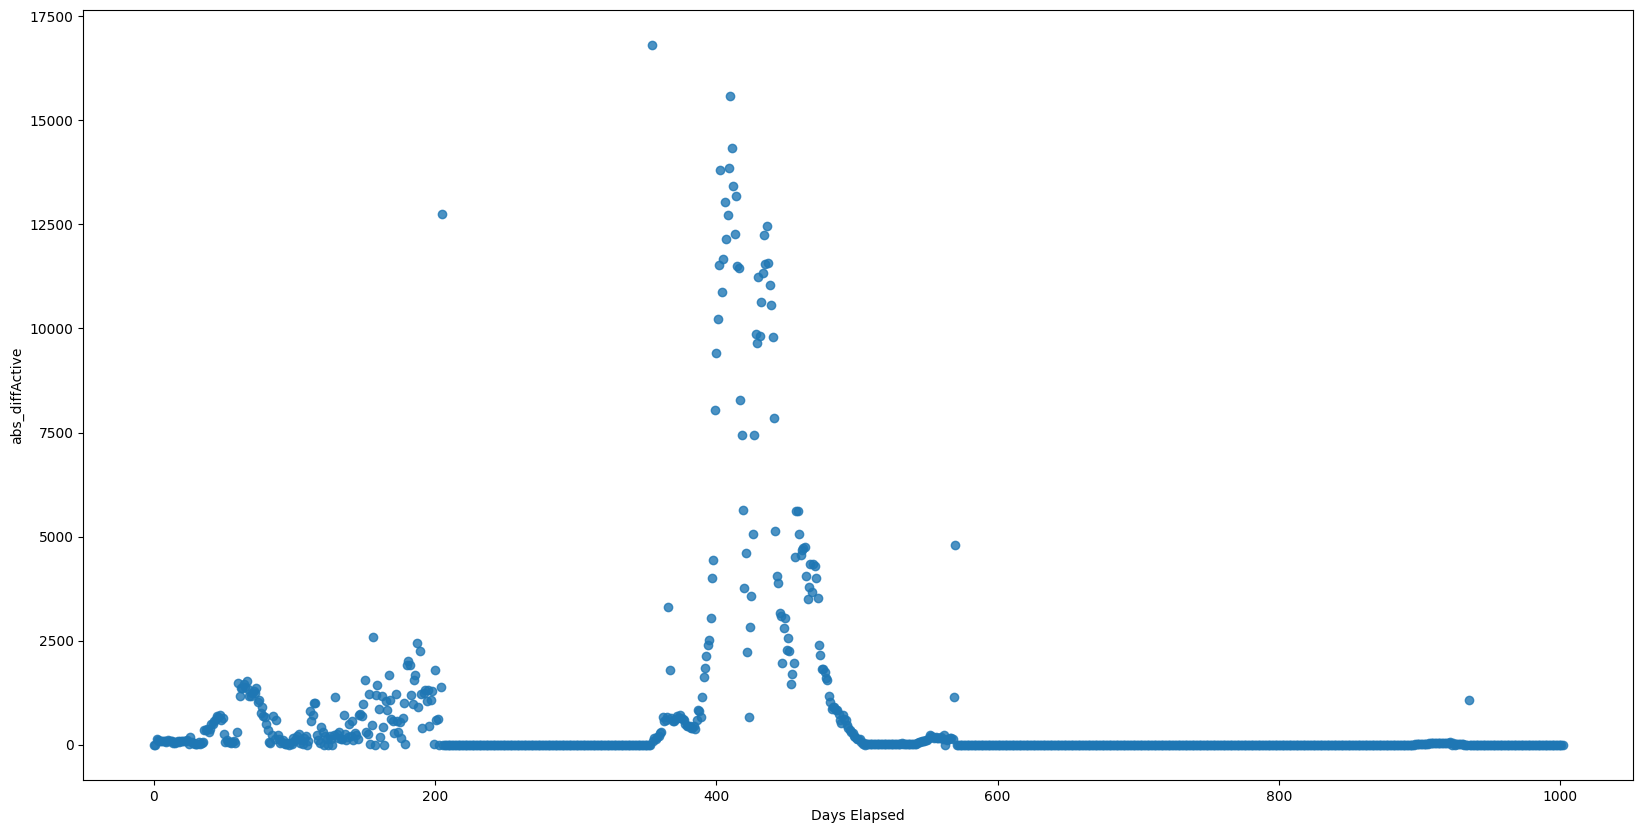

In [157]:
import seaborn as sns
sns.regplot(x='Days Elapsed', y='abs_diffActive', data=updated_df, fit_reg=False)
plt.show()

In [158]:
updated_df

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered,Days Elapsed
2020-12-31,817077,12109,796353.000000,8615.000000,1049.670736,1.481990,2020,0.000000,0.0,0.0,0.0,0
2021-01-01,817077,12109,796353.000000,8615.000000,1049.670736,1.481990,2020,0.000000,0.0,0.0,0.0,1
2021-01-02,816132,12092,795293.000000,8747.000000,1048.456727,1.481623,2020,132.000000,945.0,17.0,1060.0,2
2021-01-03,815175,12080,794228.000000,8867.000000,1047.227302,1.481890,2020,120.000000,957.0,12.0,1065.0,3
2021-01-04,814170,12069,793154.000000,8947.000000,1045.936213,1.482369,2020,80.000000,1005.0,11.0,1074.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,3594487,38049,923162.938242,4617.713892,1268.847776,1.432861,2023,0.008993,7.0,0.0,0.0,998
2023-09-26,3594478,38049,923162.938242,4617.702330,1268.847776,1.432861,2023,0.011562,9.0,0.0,0.0,999
2023-09-27,3594466,38049,923162.938242,4617.686914,1268.847776,1.432861,2023,0.015416,12.0,0.0,0.0,1000
2023-09-28,3594456,38049,923162.938242,4617.674067,1268.847776,1.432861,2023,0.012847,10.0,0.0,0.0,1001


In [180]:
# Linear Regression Model


# Split the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = updated_df['Days Elapsed']
X = X.values.reshape(-1,1)
y = updated_df['Active']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

In [181]:
#for trainning 
linreg.score(X_train, y_train)


0.06405164838965183

In [182]:
#for testing
linreg.score(X_test, y_test)


0.027256718126996926

In [183]:

print ('Co-efficient',linreg.coef_)
print ('Intercept',linreg.intercept_)

Co-efficient [-42.42708948]
Intercept 45602.04199793054


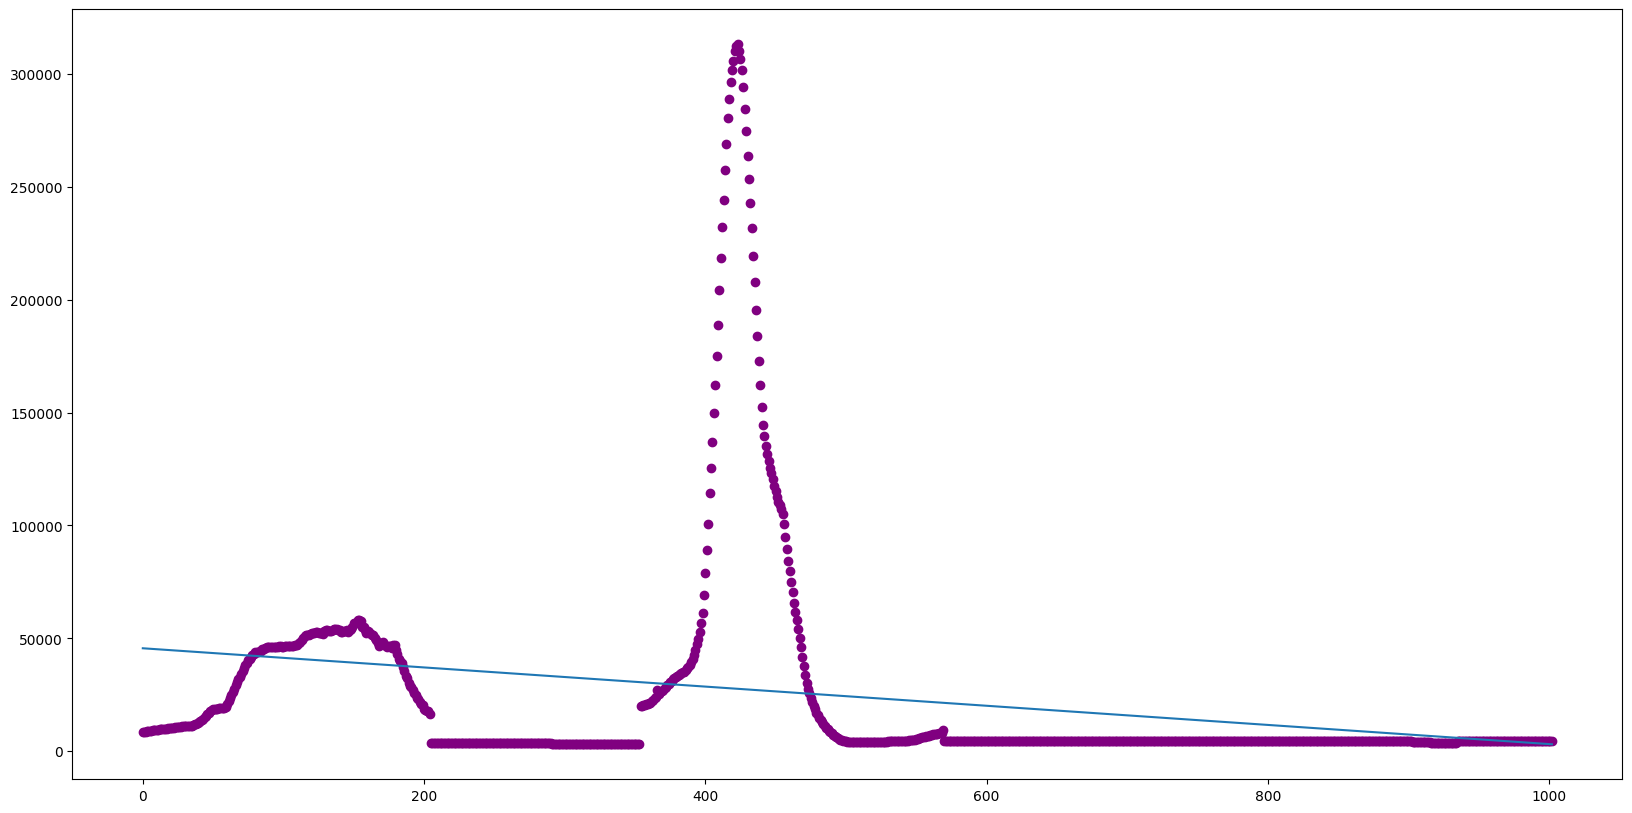

In [184]:
# Plot the Regression Line based on the Best fit line
reg_line=[(linreg.coef_*x)+linreg.intercept_ for x in updated_df['Days Elapsed']]
plt.scatter(updated_df['Days Elapsed'],updated_df['Active'],color="purple")
plt.plot(updated_df['Days Elapsed'],reg_line)
plt.show()


In [185]:

print("EVALUATION OF THE MODEL")
print("______________________________________________")
print("")
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("______________________________________________")
print("")
print("r2 error:", r2_score(y_test, y_test_pred))
print("______________________________________________")
print("")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print("______________________________________________")
print("")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print("______________________________________________")
print("")

EVALUATION OF THE MODEL
______________________________________________

Root Mean Squared Error : 47783.72909376049
______________________________________________

r2 error: 0.027256718126996926
______________________________________________

Mean Absolute Error: 24766.358661991875
______________________________________________

Mean Squared Error: 2283284766.1058927
______________________________________________



In [186]:
accuracy =r2_score(y_test, y_test_pred)

In [187]:
print("Linear Regression Model Accuracy:", round(accuracy*100, 2), "%")

Linear Regression Model Accuracy: 2.73 %
